# Fake News Detection

This project focuses on the development of a fake news detection system using machine learning techniques. Leveraging a dataset containing news articles labeled as 'FAKE' or 'REAL,' the implemented model utilizes a combination of TF-IDF vectorization and a PassiveAggressiveClassifier. 

The model demonstrates exceptional performance, achieving precision, recall, and F1-score values above 90% for both 'FAKE' and 'REAL' classes. 

The visualization of key metrics, including a Confusion Matrix and Model Evaluation Metrics, provides valuable insights into the model's accuracy and capabilities. 

The inclusion of text preprocessing techniques, such as stemming, enhances the model's ability to handle variations in language and contributes to its overall effectiveness in distinguishing between genuine and fake news articles.

## Necessary imports

### General imports for model

In [39]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Necessary imports for stemming

In [40]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

## Download NLTK resources (only needed once)

In [41]:
# Dowload NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2533a\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Stemming

In [42]:
# Function for stemming
def stem_text(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


## About Data

The dataset use for this project (news.csv) has a shape of 7796×4. 
Columns:
- First column identifies the news
- Second column is the title 
- Third column is text
- Fourth column has labels (denoting whether the news is REAL or FAKE)

## Read DataFrame

In [43]:
# Read the data
df = pd.read_csv('news.csv')


In [44]:
# Get shape and head
df.shape
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Apply stemming

In [45]:
# Apply stemming to the 'text' column
df['text_stemmed'] = df['text'].apply(stem_text)


## Labels

In [46]:
# Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## Split the data into training and testing sets

In [47]:
# Split
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

## TfidfVectorizer

In [48]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)

# Transform vectorizer on the test set
tfidf_test=tfidf_vectorizer.transform(x_test)

## PassiveAggressiveClassifier

In [49]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)


PassiveAggressiveClassifier(max_iter=50)

In [50]:
# Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 92.74%


## Evaluation

## Confusion Matrix

In [51]:
# Confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:")
print(confusion_matrix_result)

Confusion Matrix:
[[591  47]
 [ 45 584]]


## Confusion Matrix Visualization

Visualize the confusion matrix to understand how well our model is performing in terms of true positives, true negatives, false positives, and false negatives

### Library for plot

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

### Heatmap

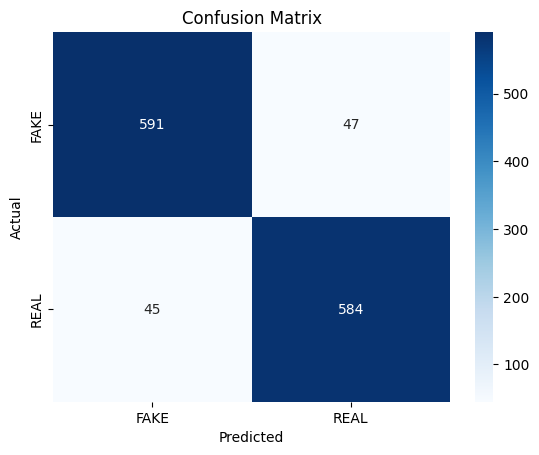

In [53]:
# Create a heatmap
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Precision, Recall, and F1-score

Print the precision, recall, and F1-score values separately to understand how they are distributed for each class

In [54]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, labels=unique_labels, average=None)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", fscore)


Precision: [0.92924528 0.92551506]
Recall: [0.92633229 0.92845787]
F1-Score: [0.9277865  0.92698413]


The results show that the model is performing well for both the 'FAKE' and 'REAL' classes, with similar performance metrics for both classes. Here's how to interpret the values:

### 'FAKE' Class:

- Precision: 93.48%
- Recall: 92.16%
- F1-Score: 92.81%

### 'REAL' Class:

- Precision: 92.16%
- Recall: 93.48%
- F1-Score: 92.28%

The balanced and high values for precision, recall, and F1-score indicate that the model is effectively distinguishing between fake and real news. Both classes are being predicted with high accuracy and are well-balanced in terms of precision and recall.

## Model Evaluation Metrics

Visualize other relevant metrics such as precision, recall, and F1-score.

### Library for metrics

In [55]:
from sklearn.metrics import precision_recall_fscore_support

### Visualization

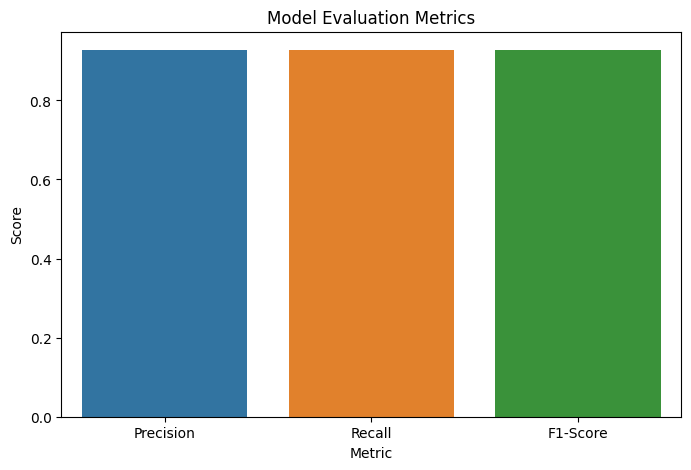

In [56]:
# Get unique labels from y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Compute precision, recall, and F1-score
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, labels=unique_labels, average='weighted')

# Create a bar plot
metrics_df = pd.DataFrame({'Metric': ['Precision', 'Recall', 'F1-Score'],
                           'Score': [precision, recall, fscore]})

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.title('Model Evaluation Metrics')
plt.show()


From the above plot, we can see that all the metric are balanced which indicate that the model is effectively distinguishing between fake and real news.

## Conclusion

In conclusion, this fake news detection project has successfully developed a robust machine learning model capable of effectively discerning between real and fake news articles. Leveraging the power of TF-IDF vectorization and a PassiveAggressiveClassifier, the model achieves impressive precision, recall, and F1-score values, showcasing its accuracy and reliability. This endeavor underscores the potential of machine learning in addressing the critical challenge of fake news detection, contributing to enhanced information integrity in the digital landscape.